In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kshitizbhargava/deepfake-face-images")

print("Path to dataset files:", path)

100%|██████████| 244M/244M [00:03<00:00, 65.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kshitizbhargava/deepfake-face-images/versions/1


In [2]:
path = '/root/.cache/kagglehub/datasets/kshitizbhargava/deepfake-face-images/versions/1/Final Dataset'

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import os

data_dir = path # Используем переменную 'path', определенную ранее

# Проверим содержимое каталога датасета
print("Содержимое каталога датасета:")
for item in os.listdir(data_dir):
    item_path = os.path.join(data_dir, item)
    if os.path.isdir(item_path):
        print(f"  Каталог: {item} (содержит {len(os.listdir(item_path))} элементов)")
    else:
        print(f"  Файл: {item}")

# Определяем параметры изображений и батча
IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 32

# Определяем трансформации для изображений
# Нормализация использует средние значения и стандартные отклонения для ImageNet
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print(f"\nЗагрузка и разделение датасета из: {data_dir}")

# Загружаем весь датасет с помощью ImageFolder
full_dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Разделяем датасет на обучающую (70%) и валидационную (30%) выборки
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Используем seed для воспроизводимости
torch.manual_seed(123)
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Создаем DataLoader'ы
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# Выводим информацию о загруженных датасетах
print(f"\nОбучающая выборка содержит {len(train_dataset)} изображений.")
print(f"Валидационная выборка содержит {len(val_dataset)} изображений.")

# Получаем названия классов
class_names = full_dataset.classes
print(f"Названия классов: {class_names}")

print("\nЗагрузка и разделение датасета завершены. 'train_loader' и 'val_loader' готовы.")

Содержимое каталога датасета:
  Каталог: Fake (содержит 7000 элементов)
  Файл: dataset.csv
  Каталог: Real (содержит 5890 элементов)

Загрузка и разделение датасета из: /root/.cache/kagglehub/datasets/kshitizbhargava/deepfake-face-images/versions/1/Final Dataset

Обучающая выборка содержит 10312 изображений.
Валидационная выборка содержит 2578 изображений.
Названия классов: ['Fake', 'Real']

Загрузка и разделение датасета завершены. 'train_loader' и 'val_loader' готовы.


In [5]:
import os

# Assuming data_dir is already defined from previous cells

print("Содержимое каталога Final Dataset:")
final_dataset_path = os.path.join(data_dir, 'Final Dataset')

if os.path.isdir(final_dataset_path):
    for item in os.listdir(final_dataset_path):
        item_path = os.path.join(final_dataset_path, item)
        if os.path.isdir(item_path):
            print(f"  Каталог: {item} (содержит {len(os.listdir(item_path))} элементов)")
        else:
            print(f"  Файл: {item}")
else:
    print(f"Каталог '{final_dataset_path}' не найден.")

print("\nПожалуйста, запустите эту ячейку, чтобы проверить структуру каталога. На основе ее вывода мы сможем скорректировать загрузку датасета, если это необходимо.")

Содержимое каталога Final Dataset:
Каталог '/root/.cache/kagglehub/datasets/kshitizbhargava/deepfake-face-images/versions/1/Final Dataset/Final Dataset' не найден.

Пожалуйста, запустите эту ячейку, чтобы проверить структуру каталога. На основе ее вывода мы сможем скорректировать загрузку датасета, если это необходимо.


Отображение случайных изображений из train_dataset:


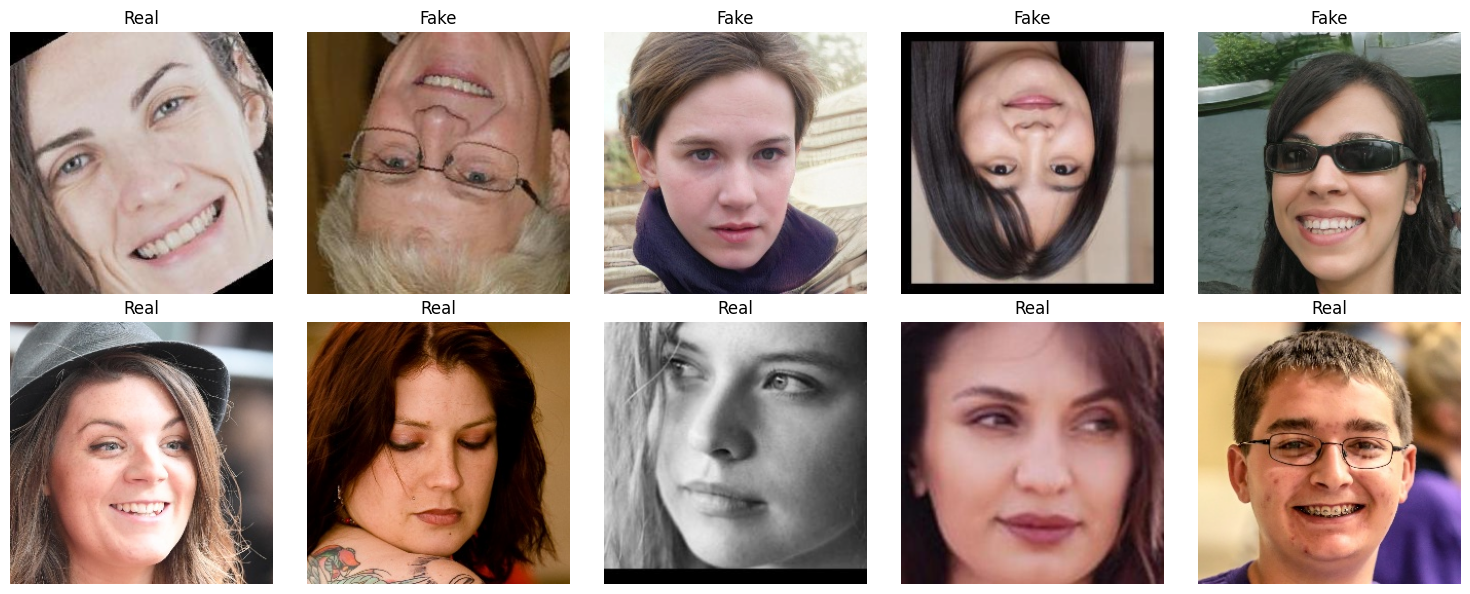


Отображение случайных изображений из val_dataset:


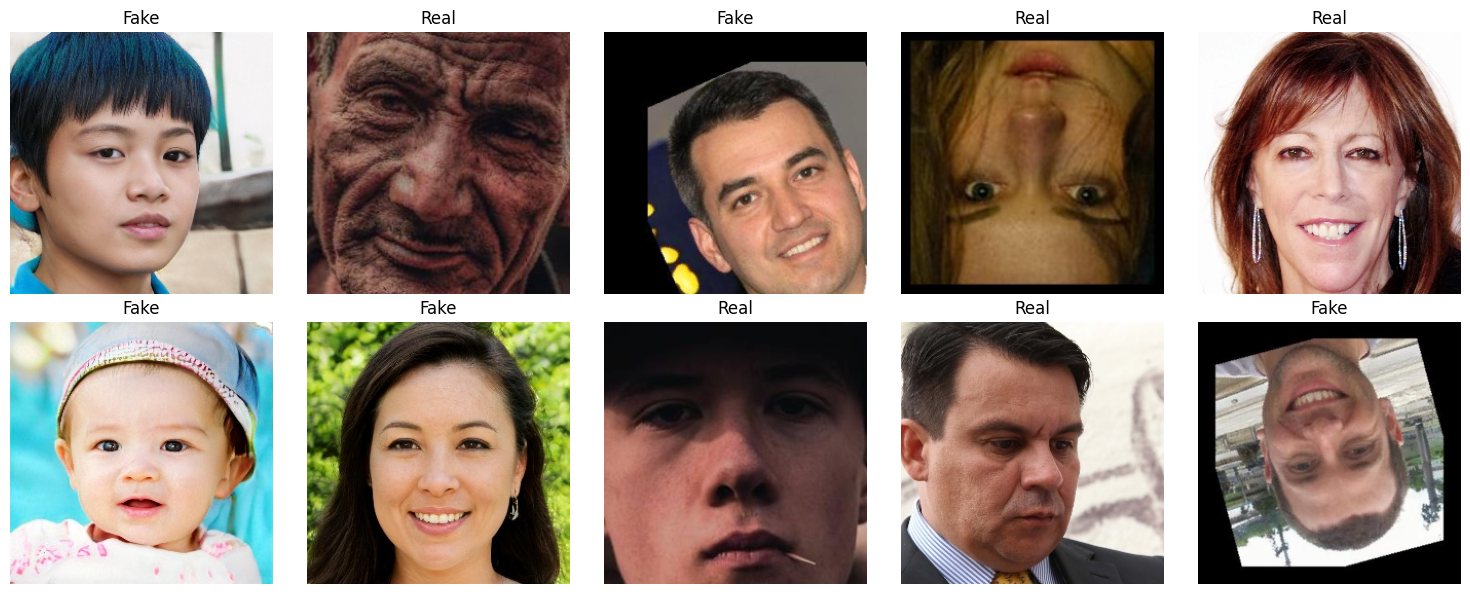

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, title=None):
    # Отменяем нормализацию с использованием тех же mean и std, что и при трансформации
    # mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]
    # img = (img * std) + mean
    # Напрямую применяем операции к тензору
    mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))

    img = img.numpy() * std + mean

    # Приводим значения к диапазону [0, 1]
    img = np.clip(img, 0, 1)

    # Переводим изображение в формат HWC для отображения
    npimg = np.transpose(img, (1, 2, 0))
    plt.imshow(npimg)
    if title: plt.title(title)
    plt.axis('off')

print("Отображение случайных изображений из train_dataset:")
plt.figure(figsize=(15, 6))
for i in range(10):
    idx = np.random.randint(0, len(train_dataset))
    image, label = train_dataset[idx]
    plt.subplot(2, 5, i + 1)
    imshow(image, title=class_names[label])
plt.tight_layout()
plt.show()

print("\nОтображение случайных изображений из val_dataset:")
plt.figure(figsize=(15, 6))
for i in range(10):
    idx = np.random.randint(0, len(val_dataset))
    image, label = val_dataset[idx]
    plt.subplot(2, 5, i + 1)
    imshow(image, title=class_names[label])
plt.tight_layout()
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm # Для красивого отображения прогресса
import matplotlib.pyplot as plt # Для графиков

class ImageClassifierTrainer:
    def __init__(self,
                 model: nn.Module,
                 train_loader: torch.utils.data.DataLoader,
                 val_loader: torch.utils.data.DataLoader,
                 learning_rate: float = 0.001,
                 num_classes: int = 2,
                 device: str = 'cuda' if torch.cuda.is_available() else 'cpu'):

        self.device = torch.device(device)
        self.model = model.to(self.device)
        self.train_loader = train_loader
        self.val_loader = val_loader

        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)

        # Списки для хранения метрик
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

        print(f"Trainer initialized. Using device: {self.device}")
        print(f"Model architecture:\n{self.model}")

    def _train_epoch(self):
        self.model.train() # Устанавливаем модель в режим обучения
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for inputs, labels in tqdm(self.train_loader, desc="Training Epoch"):
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            self.optimizer.zero_grad()

            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)

            loss.backward()
            self.optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

        epoch_loss = running_loss / total_samples
        epoch_accuracy = correct_predictions / total_samples
        return epoch_loss, epoch_accuracy

    def _validate_epoch(self):
        self.model.eval() # Устанавливаем модель в режим оценки
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        with torch.no_grad(): # Отключаем расчет градиентов для валидации
            for inputs, labels in tqdm(self.val_loader, desc="Validation Epoch"):
                inputs, labels = inputs.to(self.device), labels.to(self.device)

                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_samples += labels.size(0)
                correct_predictions += (predicted == labels).sum().item()

        epoch_loss = running_loss / total_samples
        epoch_accuracy = correct_predictions / total_samples
        return epoch_loss, epoch_accuracy

    def train(self, num_epochs: int):
        print("\nStarting training...")
        for epoch in range(num_epochs):
            train_loss, train_acc = self._train_epoch()
            val_loss, val_acc = self._validate_epoch()

            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_acc)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_acc)

            print(f'Epoch {epoch+1}/{num_epochs} - '
                  f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - '
                  f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
            self.plot_metrics()

        print("Training complete!")

    def plot_metrics(self):
        epochs = range(1, len(self.train_losses) + 1)

        plt.figure(figsize=(12, 5))

        # Plotting Loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.train_losses, 'b', label='Training loss')
        plt.plot(epochs, self.val_losses, 'r', label='Validation loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        # Plotting Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, self.train_accuracies, 'b', label='Training accuracy')
        plt.plot(epochs, self.val_accuracies, 'r', label='Validation accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def save_model(self, path: str = 'model.pth'):
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to {path}")

In [8]:
# Пример использования (позже вы замените MyCustomModel на свою модель):
class MyCustomModel(nn.Module):
    def __init__(self, num_classes=2):
        super(MyCustomModel, self).__init__()
        # Здесь будет ваша архитектура модели
        self.features = nn.Sequential(
            # Блок 1
            nn.Conv2d(3, 4, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2),

            # Блок 2
            nn.Conv2d(4, 8, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2),

            # Блок 3
            nn.Conv2d(8, 16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2),

            # Блок 4
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            # Полносвязные слои
            nn.Linear(16 * 16 * 32, 128),  # 16*16*64 = 16384
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(128, 2), # Размерность должна быть адаптирована
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x



In [9]:
# # Инициализируйте вашу модель
my_model = MyCustomModel(num_classes=len(full_dataset.classes))

# # Инициализируйте трейнер
# trainer = ImageClassifierTrainer(
#     model=my_model,
#     train_loader=train_loader,
#     val_loader=val_loader,
#     learning_rate=0.001,
#     num_classes=len(train_dataset.classes)
# )

# # Запустите обучение
# trainer.train(num_epochs=10)

# # Сохраните модель
# trainer.save_model('my_trained_model.pth')


In [10]:
# Инициализируйте трейнер
trainer = ImageClassifierTrainer(
    model=my_model,
    train_loader=train_loader,
    val_loader=val_loader,
    learning_rate=0.0003,
    num_classes=len(full_dataset.classes)
)

Trainer initialized. Using device: cpu
Model architecture:
MyCustomModel(
  (features): Sequential(
    (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=8192, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): Linear(in_features=128, out_features=2, bia


Starting training...


Validation Epoch: 100%|██████████| 81/81 [00:36<00:00,  2.22it/s]


Epoch 1/5 - Train Loss: 0.6234, Train Acc: 0.6516 - Val Loss: 0.5655, Val Acc: 0.7044


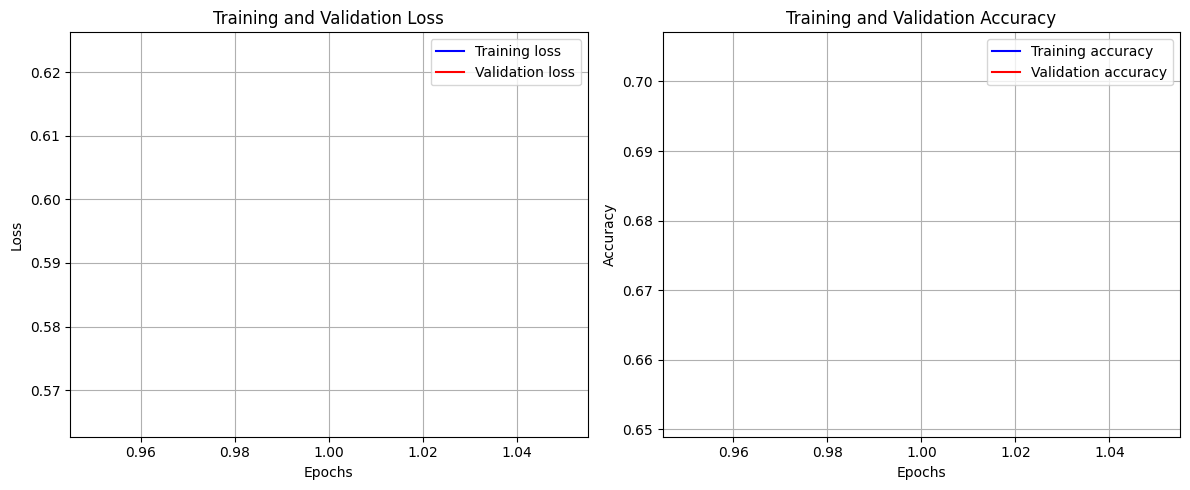

Validation Epoch: 100%|██████████| 81/81 [00:32<00:00,  2.49it/s]


Epoch 2/5 - Train Loss: 0.5180, Train Acc: 0.7336 - Val Loss: 0.4811, Val Acc: 0.7533


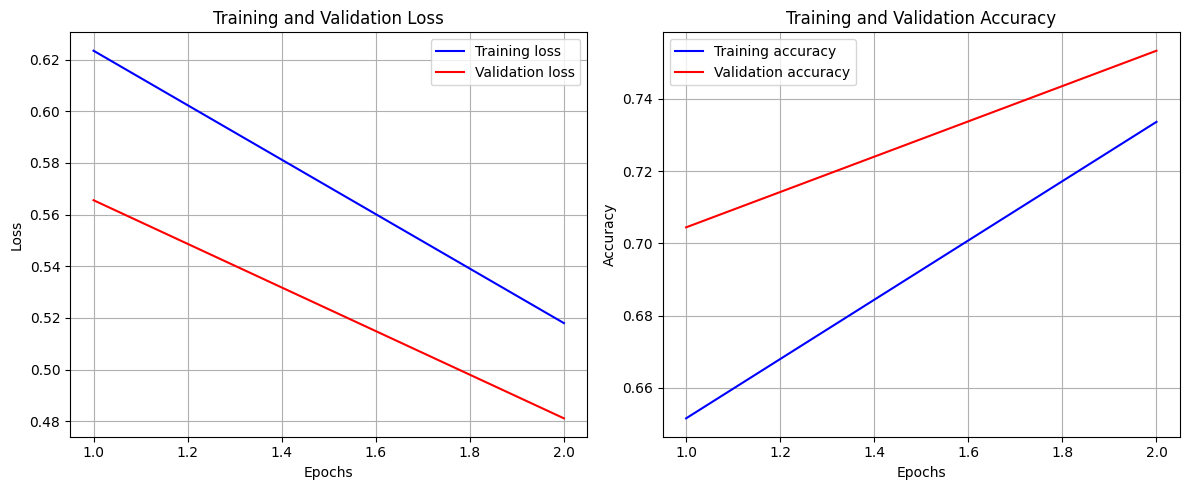

Validation Epoch: 100%|██████████| 81/81 [00:36<00:00,  2.24it/s]


Epoch 3/5 - Train Loss: 0.4409, Train Acc: 0.7835 - Val Loss: 0.4268, Val Acc: 0.7874


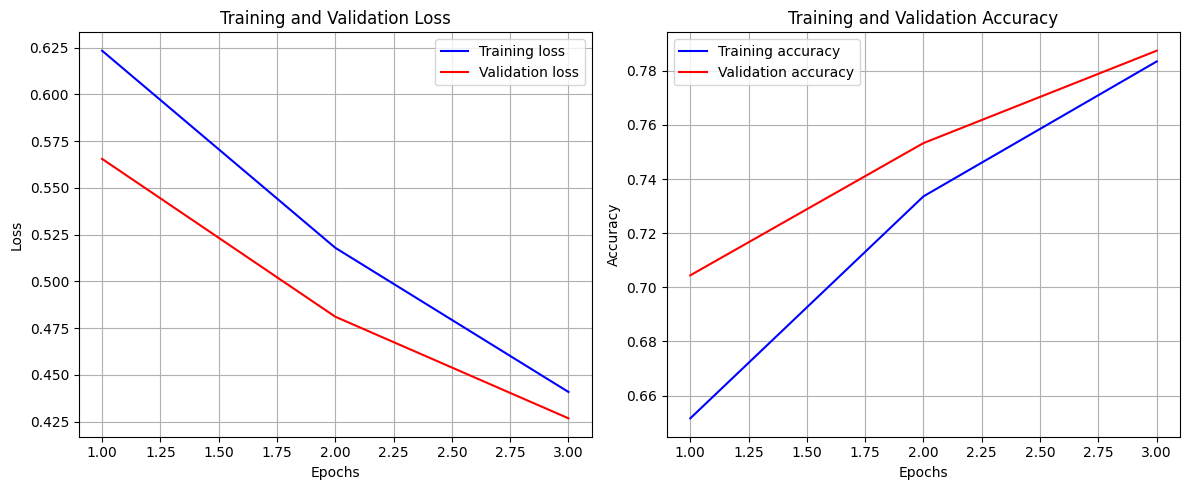

Validation Epoch: 100%|██████████| 81/81 [00:35<00:00,  2.28it/s]


Epoch 4/5 - Train Loss: 0.3777, Train Acc: 0.8214 - Val Loss: 0.4188, Val Acc: 0.7956


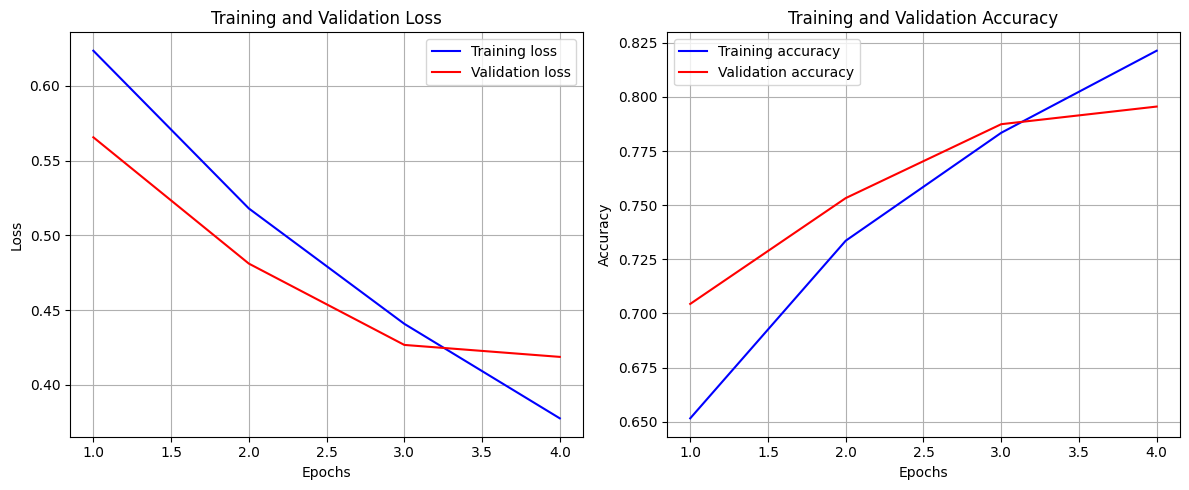

Validation Epoch: 100%|██████████| 81/81 [00:35<00:00,  2.25it/s]


Epoch 5/5 - Train Loss: 0.3187, Train Acc: 0.8573 - Val Loss: 0.3862, Val Acc: 0.8154


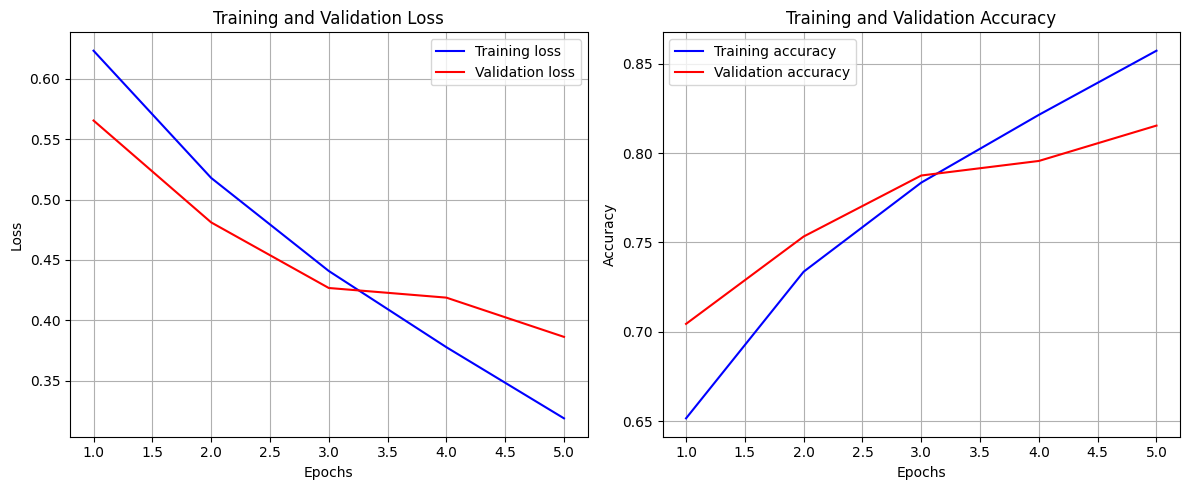

Training complete!
Model saved to my_trained_modelGan.pth


In [12]:
# Запустите обучение
trainer.train(num_epochs=1)
trainer.save_model('my_trained_modelGan.pth')
